<h1> The impact of Elon Musk’s tweets on Tesla Stock Price

Authors:\
Arindam Sharma\
Serrana Aguirregaray

Environment used: Python 3.8\
Code Run on Google Colab

References:-

* Dataset: https://www.kaggle.com/datasets/andradaolteanu/all-elon-musks-tweets

* https://www.kaggle.com/code/andradaolteanu/bitcoin-dogecoin-on-rapids-and-elon-musk

* https://medium.com/mlearning-ai/elon-musks-twitter-sentiment-analysis-with-transformers-hugging-face-roberta-49b9e61b1433

* https://www.pythonfordatascience.org/

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 735 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


<h3> Importing the libraries and dataset

In [21]:
from collections import Counter

In [3]:
# importing libraries
import sys
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import STOPWORDS as stopwords_wc
from wordcloud import WordCloud, ImageColorGenerator
import yfinance as yf
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# importing the dataset
data = pd.read_csv('/content/drive/MyDrive/Emprirical Methods/TweetsElonMusk.csv')
data.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1.381270e+18,1.381000e+18,2021-04-11 18:50:33 EEST,11-04-2021,18:50:33,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'vincent13031925', 'name': 'V...",NaN,NaN,NaN,NaN
1,1.381270e+18,1.372440e+18,2021-04-11 18:48:58 EEST,11-04-2021,18:48:58,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1.381260e+18,1.381230e+18,2021-04-11 17:49:38 EEST,11-04-2021,17:49:38,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'agnostoxxx', 'name': 'Shrubb...",NaN,NaN,NaN,NaN
3,1.381220e+18,1.381220e+18,2021-04-11 15:23:49 EEST,11-04-2021,15:23:49,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1.381130e+18,1.381080e+18,2021-04-11 09:18:47 EEST,11-04-2021,09:18:47,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'itsALLrisky', 'name': '💸💸💸',...",NaN,NaN,NaN,NaN


In [5]:
# removing irrelevant fields
tweets = data[["date", "time", "username", 
                 "tweet", "mentions", "urls", "photos", "replies_count", 
                 "retweets_count", "likes_count", "hashtags", "link"]]
tweets["year"] = tweets["date"].apply(lambda x: x.split("-")[2])

<ipython-input-5-dd41fb56e036>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets["year"] = tweets["date"].apply(lambda x: x.split("-")[2])


<h3> EDAV

In [6]:
tweets.head()

,date,time,username,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,link,year
0,11-04-2021,18:50:33,elonmusk,@vincent13031925 For now. Costs are decreasing...,[],[],[],640,444,15281,[],https://twitter.com/elonmusk/status/1381273474...,2021
1,11-04-2021,18:48:58,elonmusk,Love this beautiful shot,[],[],[],2464,1517,71161,[],https://twitter.com/elonmusk/status/1381273076...,2021
2,11-04-2021,17:49:38,elonmusk,@agnostoxxx @CathieDWood @ARKInvest Trust the ...,[],[],[],115,48,1380,[],https://twitter.com/elonmusk/status/1381258144...,2021
3,11-04-2021,15:23:49,elonmusk,The art In Cyberpunk is incredible,[],[],[],8437,10329,228144,[],https://twitter.com/elonmusk/status/1381221447...,2021
4,11-04-2021,09:18:47,elonmusk,@itsALLrisky 🤣🤣,[],[],[],446,542,7489,[],https://twitter.com/elonmusk/status/1381129584...,2021


In [7]:
# converting the string date to datetime format
tweets['date'] = pd.to_datetime(tweets['date'])

<ipython-input-7-5dedce69dbb4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['date'] = pd.to_datetime(tweets['date'])


In [8]:
# removing the year 2021 and sorting the data by date, to get the first tweet's date
tweets[tweets['year'] != '2021'].sort_values(by = 'date').head()

,date,time,username,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,link,year
12514,2010-04-06,21:31:57,elonmusk,"Please ignore prior tweets, as that was someon...",[],[],[],398,349,4710,[],https://twitter.com/elonmusk/status/15434727182,2010
12513,2011-01-12,11:55:11,elonmusk,Went to Iceland on Sat to ride bumper cars on ...,[],[],['https://pbs.twimg.com/media/Afkf5DMCAAEJGFr....,31,16,191,[],https://twitter.com/elonmusk/status/1421799282...,2011
12512,2011-01-12,12:29:04,elonmusk,I made the volume on the Model S http://t.co/...,[],['http://ow.ly/i/mtD7'],[],31,9,79,[],https://twitter.com/elonmusk/status/1421884581...,2011
12511,2011-03-12,10:20:28,elonmusk,"Great Voltaire quote, arguably better than Twa...",[],[],[],7,24,30,[],https://twitter.com/elonmusk/status/1428808713...,2011
12510,2011-03-12,10:22:07,elonmusk,That was a total non sequitur btw,[],[],[],29,6,52,[],https://twitter.com/elonmusk/status/1428812840...,2011


In [9]:
# making a date list variable
date_list = []
for x in tweets['date']:
  if '2020' in str(x).split('-'):
    date_list.append(x)

In [10]:
date_list[0]

Timestamp('2020-12-31 00:00:00')

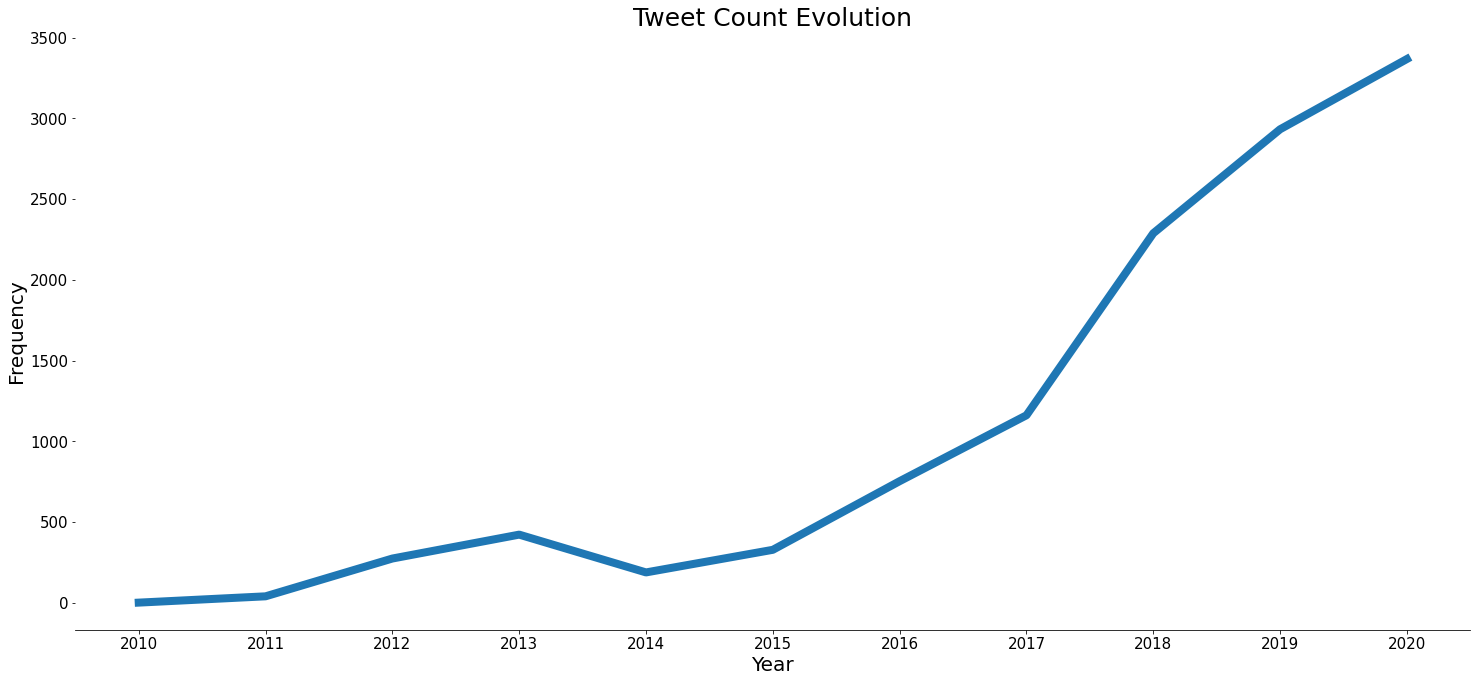

In [11]:
# checking the frequency of the tweets per year

# not including 2021 as it is not complete
date_count_df = tweets[tweets["year"]!="2021"].groupby("year")["tweet"].count().reset_index()

# Plot
plt.figure(figsize=(25, 11))
ax = sns.lineplot(data=date_count_df, x="year", y="tweet", lw=8)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
plt.title("Tweet Count Evolution", size=25)
plt.xlabel("Year", size=20)
plt.ylabel("Frequency", size=20)
sns.despine(left=True);

In [13]:
# function to display values at the end of seaborn barplot

def show_values_on_bars(axs, h_v="v", space=0.4):
    
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, format(value, ','), ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, format(value, ','), ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

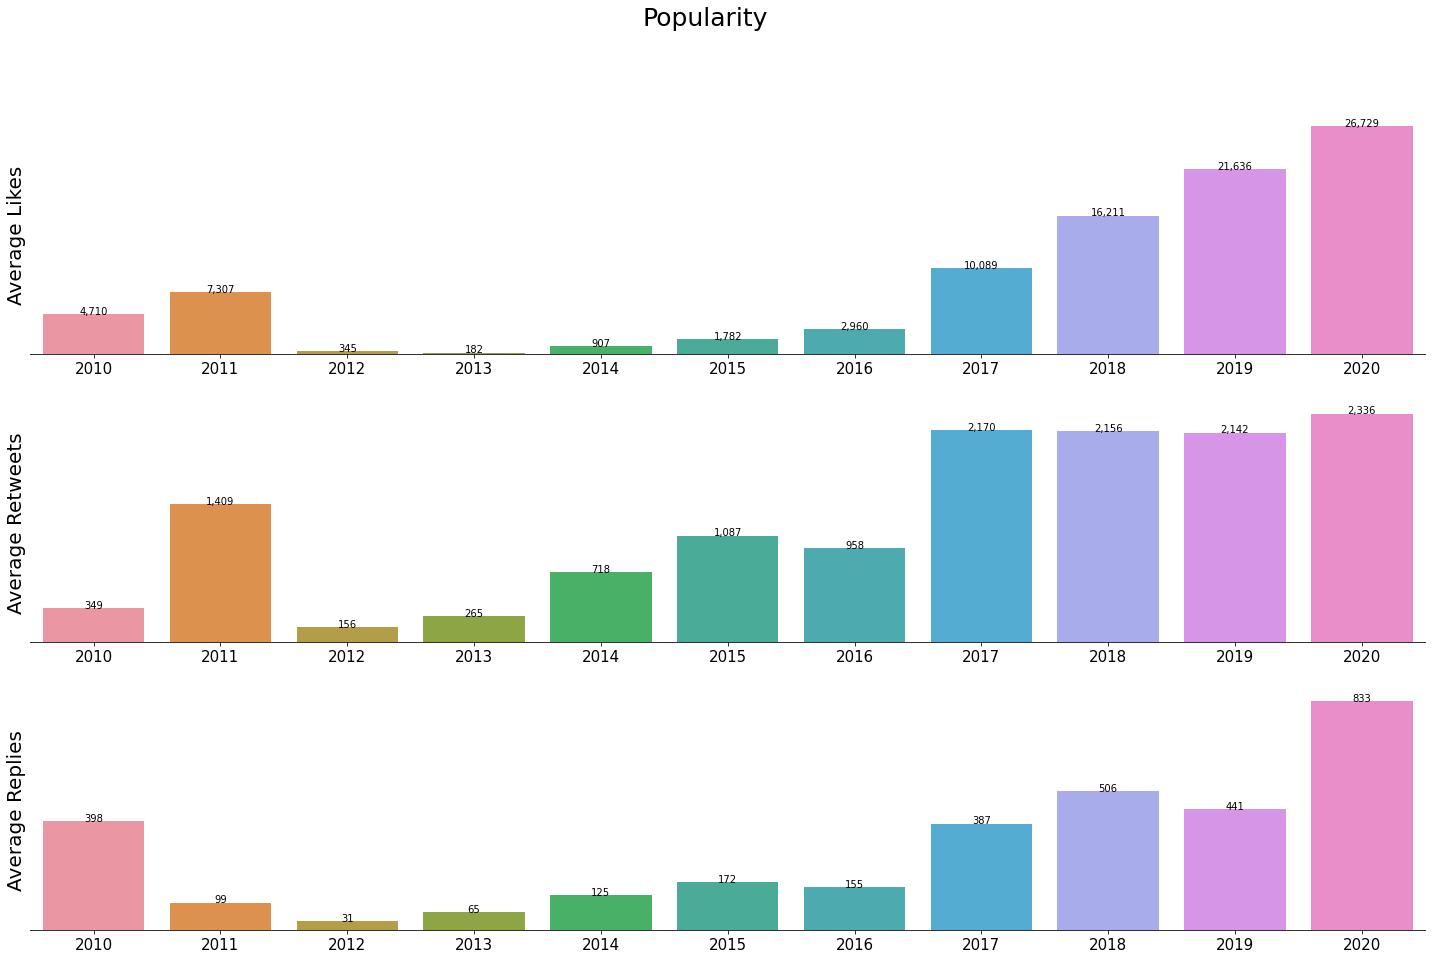

In [14]:
# plotting average likes, average retweets and average replies
popularity = ["likes_count", "retweets_count", "replies_count"]
popularity_df = tweets[tweets["year"]!="2021"].groupby("year").agg({popularity[0] : 'sum',
                                                                    popularity[1] : 'sum',
                                                                    popularity[2] : 'sum',
                                                                    'tweet' : 'count'}).reset_index()
popularity_df["likes_count"] = popularity_df["likes_count"]/popularity_df["tweet"]
popularity_df["retweets_count"] = popularity_df["retweets_count"]/popularity_df["tweet"]
popularity_df["replies_count"] = popularity_df["replies_count"]/popularity_df["tweet"]

# Plot
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(25, 15))
axs = [ax1, ax2, ax3]
plt.suptitle("Popularity", size=25)
sns.barplot(data=popularity_df, x="year", y="likes_count", lw=9, ax=ax1)
sns.barplot(data=popularity_df, x="year", y="retweets_count", lw=9, ax=ax2)
sns.barplot(data=popularity_df, x="year", y="replies_count", lw=9, ax=ax3)
names = ["Average Likes", "Average Retweets", "Average Replies"]
for ax, n in zip(axs, names):
    ax.set_xlabel("", size=20)
    ax.set_ylabel(n, size=20)
    ax.get_yaxis().set_ticks([])
#     ax.title.set_text(n)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor', labelsize=15)
    show_values_on_bars(axs=ax, h_v="v", space=0.4)
sns.despine(left=True);

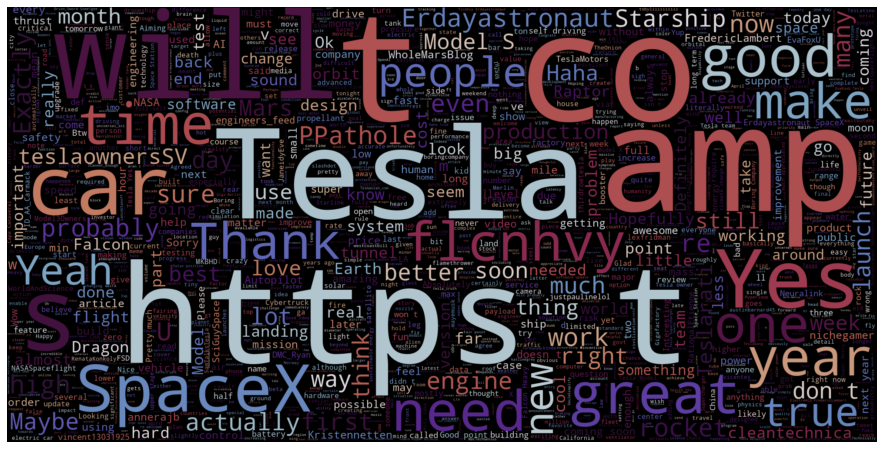

In [15]:
# generating the wordcloud
all_tweets = " ".join(token for token in tweets["tweet"])
stopwords_wc = set(stopwords_wc)

wordcloud = WordCloud(stopwords=stopwords_wc,
                      max_words=1500,
                      max_font_size=350, random_state=42,
                      width=2000, height=1000,
                      colormap = "twilight")
wordcloud.generate(all_tweets)

# Plot
plt.figure(figsize = (16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show();

<h3> Stock Data

In [ ]:
# gettting the stock data from YFinance

start_date = '2010-04-06'
end_date = '2020-12-31'

ticker = 'TSLA'

stock_data = yf.download(ticker, start_date, end_date)
stock_data['Date'] = stock_data.index
stock_data = stock_data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
stock_data.reset_index(drop = True, inplace = True)
print(stock_data.tail())

[*********************100%***********************]  1 of 1 completed
           Date        Open        High         Low       Close   Adj Close  \
2641 2020-12-23  210.733337  217.166672  207.523331  215.326660  215.326660   
2642 2020-12-24  214.330002  222.029999  213.666672  220.589996  220.589996   
2643 2020-12-28  224.836670  227.133331  220.266663  221.229996  221.229996   
2644 2020-12-29  220.333328  223.300003  218.333328  221.996674  221.996674   
2645 2020-12-30  224.000000  232.199997  222.786667  231.593338  231.593338   

         Volume  
2641   99519000  
2642   68596800  
2643   96835800  
2644   68732400  
2645  128538000  


In [ ]:
# saving the data to a csv file
stock_data.to_csv("Tesla_Stock.csv")

In [16]:
pd.read_csv('/content/drive/MyDrive/Emprirical Methods/Tesla_Stock.csv').head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


<h3> Pre-Processing the data

<h4> Text pre-processing

In [ ]:
# hashtags removal

import re 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

def hashtags(text):
  hash = re.findall(r"#(\w+)", text)
  return hash

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!pip install emot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 14 kB/s 


In [ ]:
# emoji translation
from emot.emo_unicode import UNICODE_EMOJI, EMOTICONS_EMO


def emoji(text):
  for emot in UNICODE_EMOJI:
    if text == None:
      text = text
    else:
      text = text.replace(emot, "_".join(UNICODE_EMOJI[emot].replace(",", "").split()))
    return text

In [ ]:
def remove_users(tweet):
  '''Takes a string and removes retweet and @user information'''
  tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) 
  # remove tweeted at
  return tweet

In [ ]:
# links removal
def remove_links(tweet):
  tweet = re.sub(r'http\S+', '', tweet) # remove http links
  tweet = re.sub(r'bit.ly/\S+', '', tweet) # remove bitly links
  tweet = tweet.strip('[link]') # remove [links]
  return tweet

def clean_html(text):
  html = re.compile('<.*?.')
  return html.sub(r'', text)

In [ ]:
# non ascii character removal
def non_ascii(s):
  return ''.join(i for i in s if ord(i)<128)

def lower(text):
  return text.lower()

In [ ]:
def email_address(text):
  email = re.compile(r'[\w\.-]+@[\w\.-]+')
  return email.sub(r'', text)

def punct(text):
  token = RegexpTokenizer(r'\w+')
  text = token.tokenize(text)
  text = ' '.join(text)
  return text

In [ ]:
# stop words removal
def removeStopWords(str):
  cachedStopWords = set(stopwords.words("english"))
  cachedStopWords.update(('and','I','A','http','And','So','arnt','This','When','It','many','Many','so','cant','Yes','yes','No','no','These','these','mailto','regards','ayanna','like','email'))
  new_str = ' '.join([word for word in str.split() if word not in cachedStopWords])
  return new_str

In [ ]:
# special characters removal
def remove_(tweet):
  tweet = re.sub('([_]+)', '', tweet)
  return tweet

In [ ]:
# making a copy of the tweet data to work with
dfSentiment = pd.DataFrame.copy(tweets)
dfSentiment.head()

,date,time,username,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,link,year
0,2021-11-04,18:50:33,elonmusk,@vincent13031925 For now. Costs are decreasing...,[],[],[],640,444,15281,[],https://twitter.com/elonmusk/status/1381273474...,2021
1,2021-11-04,18:48:58,elonmusk,Love this beautiful shot,[],[],[],2464,1517,71161,[],https://twitter.com/elonmusk/status/1381273076...,2021
2,2021-11-04,17:49:38,elonmusk,@agnostoxxx @CathieDWood @ARKInvest Trust the ...,[],[],[],115,48,1380,[],https://twitter.com/elonmusk/status/1381258144...,2021
3,2021-11-04,15:23:49,elonmusk,The art In Cyberpunk is incredible,[],[],[],8437,10329,228144,[],https://twitter.com/elonmusk/status/1381221447...,2021
4,2021-11-04,09:18:47,elonmusk,@itsALLrisky 🤣🤣,[],[],[],446,542,7489,[],https://twitter.com/elonmusk/status/1381129584...,2021


In [ ]:
# applying each function made above to the tweets
dfSentiment['hashtag'] = dfSentiment.tweet.apply(func = hashtags)
dfSentiment['new_tweet'] = dfSentiment.tweet.apply(func = emoji)
dfSentiment['new_tweet'] = dfSentiment.new_tweet.apply(func = remove_users)
dfSentiment['new_tweet'] = dfSentiment.new_tweet.apply(func = clean_html)
dfSentiment['new_tweet'] = dfSentiment.new_tweet.apply(func = remove_links)
dfSentiment['new_tweet'] = dfSentiment.new_tweet.apply(func = non_ascii)
dfSentiment['new_tweet'] = dfSentiment.new_tweet.apply(func = lower)
dfSentiment['new_tweet'] = dfSentiment.new_tweet.apply(func = email_address)
dfSentiment['new_tweet'] = dfSentiment.new_tweet.apply(func = removeStopWords)
dfSentiment['new_tweet'] = dfSentiment.new_tweet.apply(func = clean_html)
dfSentiment['new_tweet'] = dfSentiment.new_tweet.apply(func = punct)
dfSentiment['new_tweet'] = dfSentiment.new_tweet.apply(func = remove_)

In [ ]:
# displaying final tweets
dfSentiment['new_tweet']

0                             now costs decreasing rapidly
1                                      love beautiful shot
2                                              trust shrub
3                                 art cyberpunk incredible
4                                                         
                               ...                        
12557    yeah scalable grad student idea try use advanc...
12558    night job day job working ruthenium tantalum u...
12559    true ancient times flip cpu registers explicit...
12560                                           absolutely
12561    tesla building collision repair capability hel...
Name: new_tweet, Length: 12562, dtype: object

In [ ]:
dfSentiment.head()

,date,time,username,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,link,year,hashtag,new_tweet
0,2021-11-04,18:50:33,elonmusk,@vincent13031925 For now. Costs are decreasing...,[],[],[],640,444,15281,[],https://twitter.com/elonmusk/status/1381273474...,2021,[],now costs decreasing rapidly
1,2021-11-04,18:48:58,elonmusk,Love this beautiful shot,[],[],[],2464,1517,71161,[],https://twitter.com/elonmusk/status/1381273076...,2021,[],love beautiful shot
2,2021-11-04,17:49:38,elonmusk,@agnostoxxx @CathieDWood @ARKInvest Trust the ...,[],[],[],115,48,1380,[],https://twitter.com/elonmusk/status/1381258144...,2021,[],trust shrub
3,2021-11-04,15:23:49,elonmusk,The art In Cyberpunk is incredible,[],[],[],8437,10329,228144,[],https://twitter.com/elonmusk/status/1381221447...,2021,[],art cyberpunk incredible
4,2021-11-04,09:18:47,elonmusk,@itsALLrisky 🤣🤣,[],[],[],446,542,7489,[],https://twitter.com/elonmusk/status/1381129584...,2021,[],


In [ ]:
dfSentiment[['date', 'username', 'new_tweet','replies_count', 'retweets_count', 'likes_count']].head(10)

,date,username,new_tweet,replies_count,retweets_count,likes_count
0,2021-11-04,elonmusk,now costs decreasing rapidly,640,444,15281
1,2021-11-04,elonmusk,love beautiful shot,2464,1517,71161
2,2021-11-04,elonmusk,trust shrub,115,48,1380
3,2021-11-04,elonmusk,art cyberpunk incredible,8437,10329,228144
4,2021-11-04,elonmusk,,446,542,7489
5,2021-11-04,elonmusk,nope haha,234,65,2536
6,2021-11-04,elonmusk,dont say anything amp engage autopilot soon gu...,222,201,2625
7,2021-11-04,elonmusk,rocket hardcore veteran missions,214,296,11956
8,2021-11-04,elonmusk,blimps rock,8811,6661,165302
9,2021-10-04,elonmusk,due lower gravity travel surface mars surface ...,1595,1936,48034


In [ ]:
dfSentiment[['tweet', 'new_tweet']].tail()

,tweet,new_tweet
12557,"@eugenelee3 @PPathole @SpaceX @Tesla Yeah, not...",yeah scalable grad student idea try use advanc...
12558,@PPathole @SpaceX @Tesla That was my night job...,night job day job working ruthenium tantalum u...
12559,@PPathole @SpaceX @Tesla True. Ancient times …...,true ancient times flip cpu registers explicit...
12560,@Erdayastronaut @Tesla Absolutely,absolutely
12561,@Erdayastronaut @Tesla Tesla is building up co...,tesla building collision repair capability hel...


In [ ]:
# saving the data to a csv
dfSentiment.to_csv('tweets_preprocessed.csv')

In [17]:
!pip install transformers
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 4.0 MB/s 
     |████████████████████████████████| 182 kB 61.3 MB/s 
     |████████████████████████████████| 7.6 MB 53.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<h3> Sentiment Analysis

Sentiment analysis was done on local Jupyter Notebook (Python 3.8) because the code was somehow not working on Google Colab. A notebook has been provided separately for that. The code was run there and the output file of that code was used here.

In [18]:
sentiments = pd.read_csv('/content/drive/MyDrive/Emprirical Methods/tweets_with_sentiment.csv')

([<matplotlib.patches.Wedge at 0x7f9243744460>,
 [Text(-0.0037082304929944216, 1.0999937495397922, 'negative'),
  Text(-1.022959286064683, -0.404418470218701, 'neutral'),
  Text(0.40096767908617265, -1.0243168066219788, 'positive')],
 [Text(-0.0020226711779969568, 0.5999965906580684, '50.1%'),
  Text(-0.557977792398918, -0.22059189284656414, '11.8%'),
  Text(0.21870964313791233, -0.5587182581574429, '38.1%')])

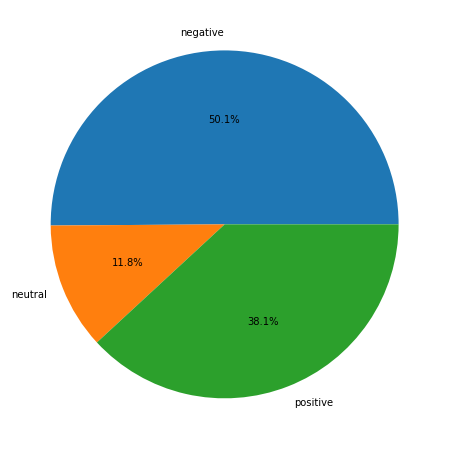

In [19]:
# seeing the distribution of sentiments
plt.figure(figsize = (16, 8))
plt.pie(sentiments.groupby('sentiment')['tweet'].count(), labels = ['negative','neutral','positive'], autopct = '%1.1f%%')

In [ ]:
# getting the number of tweets in each sentiment
sentiments.groupby('sentiment')['tweet'].count()

sentiment
0.0    5837
1.0    1371
2.0    4441
Name: tweet, dtype: int64

In [22]:
sentiments.head(3)

,Unnamed: 0,Unnamed: 0.1,date,time,username,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,link,year,hashtag,new_tweet,sentiment
0,0,0,2021-11-04,18:50:33,elonmusk,@vincent13031925 For now. Costs are decreasing...,[],[],[],640,444,15281,[],https://twitter.com/elonmusk/status/1381273474...,11,[],now costs decreasing rapidly,0.0
1,1,1,2021-11-04,18:48:58,elonmusk,Love this beautiful shot,[],[],[],2464,1517,71161,[],https://twitter.com/elonmusk/status/1381273076...,11,[],love beautiful shot,1.0
2,2,2,2021-11-04,17:49:38,elonmusk,@agnostoxxx @CathieDWood @ARKInvest Trust the ...,[],[],[],115,48,1380,[],https://twitter.com/elonmusk/status/1381258144...,11,[],trust shrub,0.0


In [23]:
# taking out the mean emotion for each day
date_sentiment = sentiments.groupby('date').sentiment.mean()
date_sentiment.head(3)

date
2010-04-06    0.0
2011-01-12    1.5
2011-03-12    1.0
Name: sentiment, dtype: float64

In [24]:
date_sentiment_df = pd.DataFrame({'Date': date_sentiment.index, 'Sentiment': date_sentiment.values})
date_sentiment_df

,Date,Sentiment
0,2010-04-06,0.000000
1,2011-01-12,1.500000
2,2011-03-12,1.000000
3,2011-04-12,2.000000
4,2011-12-21,1.500000
...,...,...
2032,2021-11-03,0.888889
2033,2021-11-04,0.625000
2034,2021-12-01,1.166667
2035,2021-12-02,1.500000


In [25]:
# reading in the tela stock price csv
tesla_stock = pd.read_csv('/content/drive/MyDrive/Emprirical Methods/Tesla_Stock.csv')
tesla_stock.head(3)

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000


In [26]:
# adding a new variable for the net change in Stock price per day
tesla_stock['delta'] = tesla_stock.Close.diff()
tesla_stock.head(3)

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,delta
0,0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN
1,1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,-0.004000
2,2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,-0.124667


In [27]:
tesla_stock.set_index('Date')

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,delta
Date,,,,,,,,
2010-06-29,0,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN
2010-06-30,1,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,-0.004000
2010-07-01,2,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,-0.124667
2010-07-02,3,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,-0.184000
2010-07-06,4,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,-0.206000
...,...,...,...,...,...,...,...,...
2020-12-23,2641,210.733337,217.166672,207.523331,215.326660,215.326660,99519000,1.879990
2020-12-24,2642,214.330002,222.029999,213.666672,220.589996,220.589996,68596800,5.263336
2020-12-28,2643,224.836670,227.133331,220.266663,221.229996,221.229996,96835800,0.639999


In [28]:
# date is stil a string
type(date_sentiment_df['Date'][0])

str

In [29]:
date_sentiment_df.set_index('Date')

,Sentiment
Date,
2010-04-06,0.000000
2011-01-12,1.500000
2011-03-12,1.000000
2011-04-12,2.000000
2011-12-21,1.500000
...,...
2021-11-03,0.888889
2021-11-04,0.625000
2021-12-01,1.166667


In [30]:
# making a copy to work with
tesla_stock_copy = tesla_stock.copy()

In [32]:
# converting the dates in both datasets to datetime format
date_sentiment_df['Date'] = pd.to_datetime(date_sentiment_df['Date'])
tesla_stock_copy['Date'] = pd.to_datetime(tesla_stock_copy['Date'])

In [33]:
# merging both the datasets based on dates
merged_dfs = pd.merge(tesla_stock_copy, date_sentiment_df, how='inner', left_index=True, right_index=True)
merged_dfs

,Unnamed: 0,Date_x,Open,High,Low,Close,Adj Close,Volume,delta,Date_y,Sentiment
0,0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN,2010-04-06,0.000000
1,1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,-0.004000,2011-01-12,1.500000
2,2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,-0.124667,2011-03-12,1.000000
3,3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,-0.184000,2011-04-12,2.000000
4,4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,-0.206000,2011-12-21,1.500000
...,...,...,...,...,...,...,...,...,...,...,...
2032,2032,2018-07-25,19.782667,20.641333,19.633333,20.582666,20.582666,106131000,0.754000,2021-11-03,0.888889
2033,2033,2018-07-26,20.323334,20.713333,20.242666,20.443333,20.443333,69457500,-0.139334,2021-11-04,0.625000
2034,2034,2018-07-27,20.483334,20.512667,19.689333,19.812000,19.812000,85549500,-0.631332,2021-12-01,1.166667
2035,2035,2018-07-30,19.726667,19.740000,19.075333,19.344667,19.344667,102211500,-0.467333,2021-12-02,1.500000


In [34]:
merged_dfs_copy = merged_dfs[['Sentiment', 'delta']]
merged_dfs_copy

,Sentiment,delta
0,0.000000,NaN
1,1.500000,-0.004000
2,1.000000,-0.124667
3,2.000000,-0.184000
4,1.500000,-0.206000
...,...,...
2032,0.888889,0.754000
2033,0.625000,-0.139334
2034,1.166667,-0.631332
2035,1.500000,-0.467333


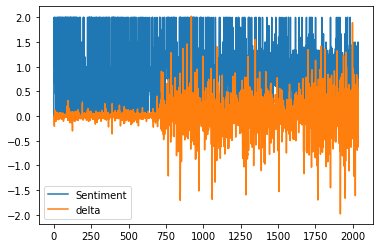

In [35]:
# random plot
merged_dfs_copy.plot()

In [36]:
from matplotlib.widgets import EllipseSelector

# making a copy to work with
merged_df_copy = merged_dfs.copy()

# taking the net emotion of the day
# if the mean emotion is less than 0.75, net it to zero
# if it is between 0.75 and 1.25, net it to 1
# otherwise zero
for index in range(len(merged_df_copy)):
  if merged_df_copy['Sentiment'][index] <= 0.75:
    merged_df_copy['Sentiment'][index] = 0
  elif merged_df_copy['Sentiment'][index] > 0.75 and merged_df_copy['Sentiment'][index] <= 1.25:
    merged_df_copy['Sentiment'][index] = 1
  else:
    merged_df_copy['Sentiment'][index] = 2
  if merged_df_copy['delta'][index] < 0:
    merged_df_copy['delta'][index] = 0
  else:
    merged_df_copy['delta'][index] = 1

<ipython-input-36-98194d5bfd1e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_copy['Sentiment'][index] = 0
<ipython-input-36-98194d5bfd1e>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_copy['delta'][index] = 1
<ipython-input-36-98194d5bfd1e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_copy['Sentiment'][index] = 2
<ipython-input-36-98194d5bfd1e>:18: SettingWithCopyWarning: 
A value is trying t

In [37]:
# getting correlation
merged_df_copy[['Sentiment', 'delta']].corr()

,Sentiment,delta
Sentiment,1.000000,0.024388
delta,0.024388,1.000000


In [38]:
# making a new column to classify tesla and non-tesla tweets
sentiments['Tesla'] = [None]*len(sentiments)

In [39]:
# if the tweet contains the word tesla, making the value inside column to 1
# otherwise, zero
for index in range(len(sentiments)):
  if 'tesla' in sentiments['tweet'][index].lower():
    sentiments['Tesla'][index] = 1
  else:
    sentiments['Tesla'][index] = 0

<ipython-input-39-6028f5472a21>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiments['Tesla'][index] = 0
<ipython-input-39-6028f5472a21>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiments['Tesla'][index] = 1


In [41]:
# merging the new dataset with tesla variable and net emotion 
merged_dfs_new = pd.merge(tesla_stock_copy, sentiments, how='inner', left_index=True, right_index=True)
merged_dfs_new

,Unnamed: 0_x,Date,Open,High,Low,Close,Adj Close,Volume,delta,Unnamed: 0_y,...,replies_count,retweets_count,likes_count,hashtags,link,year,hashtag,new_tweet,sentiment,Tesla
0,0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN,0,...,640,444,15281,[],https://twitter.com/elonmusk/status/1381273474...,11,[],now costs decreasing rapidly,0.0,0
1,1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,-0.004000,1,...,2464,1517,71161,[],https://twitter.com/elonmusk/status/1381273076...,11,[],love beautiful shot,1.0,0
2,2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,-0.124667,2,...,115,48,1380,[],https://twitter.com/elonmusk/status/1381258144...,11,[],trust shrub,0.0,0
3,3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,-0.184000,3,...,8437,10329,228144,[],https://twitter.com/elonmusk/status/1381221447...,11,[],art cyberpunk incredible,2.0,0
4,4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,-0.206000,4,...,446,542,7489,[],https://twitter.com/elonmusk/status/1381129584...,11,[],NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2641,2641,2020-12-23,210.733337,217.166672,207.523331,215.326660,215.326660,99519000,1.879990,2641,...,55,99,1818,[],https://twitter.com/elonmusk/status/1270798719...,10,[],hundreds improvements manufacturability primar...,0.0,0
2642,2642,2020-12-24,214.330002,222.029999,213.666672,220.589996,220.589996,68596800,5.263336,2642,...,38,48,922,[],https://twitter.com/elonmusk/status/1270795898...,10,[],also insulation deep cryogen id call anything ...,0.0,0
2643,2643,2020-12-28,224.836670,227.133331,220.266663,221.229996,221.229996,96835800,0.639999,2643,...,349,538,10347,[],https://twitter.com/elonmusk/status/1270794583...,10,[],tesla factory workplace safety 5 better indust...,2.0,1
2644,2644,2020-12-29,220.333328,223.300003,218.333328,221.996674,221.996674,68732400,0.766678,2644,...,63,101,1760,[],https://twitter.com/elonmusk/status/1270791638...,10,[],important technical note due higher o f ch4 vs...,0.0,0


In [42]:
# pearson correlation
merged_dfs_new.corr(method='pearson')

,Unnamed: 0_x,Open,High,Low,Close,Adj Close,Volume,delta,Unnamed: 0_y,Unnamed: 0.1,replies_count,retweets_count,likes_count,year,sentiment
Unnamed: 0_x,1.000000,0.602551,0.601525,0.604017,0.601423,0.601423,0.544477,0.074138,1.000000,1.000000,-0.192495,-0.123602,-0.179606,0.007072,-0.012542
Open,0.602551,1.000000,0.999568,0.999467,0.999060,0.999060,0.384327,0.154981,0.602551,0.602551,-0.103818,-0.063270,-0.089895,0.017649,-0.031415
High,0.601525,0.999568,1.000000,0.999352,0.999631,0.999631,0.390596,0.170511,0.601525,0.601525,-0.103643,-0.063357,-0.089860,0.016771,-0.031187
Low,0.604017,0.999467,0.999352,1.000000,0.999464,0.999464,0.378264,0.168861,0.604017,0.604017,-0.104669,-0.063505,-0.090423,0.017905,-0.031984
Close,0.601423,0.999060,0.999631,0.999464,1.000000,1.000000,0.384568,0.186897,0.601423,0.601423,-0.104296,-0.063585,-0.090256,0.017211,-0.031955
Adj Close,0.601423,0.999060,0.999631,0.999464,1.000000,1.000000,0.384568,0.186897,0.601423,0.601423,-0.104296,-0.063585,-0.090256,0.017211,-0.031955
Volume,0.544477,0.384327,0.390596,0.378264,0.384568,0.384568,1.000000,0.095382,0.544477,0.544477,-0.102793,-0.079460,-0.095777,-0.028666,-0.009797
delta,0.074138,0.154981,0.170511,0.168861,0.186897,0.186897,0.095382,1.000000,0.074138,0.074138,-0.016736,-0.009563,-0.011458,-0.008219,-0.001798
Unnamed: 0_y,1.000000,0.602551,0.601525,0.604017,0.601423,0.601423,0.544477,0.074138,1.000000,1.000000,-0.192495,-0.123602,-0.179606,0.007072,-0.012542
Unnamed: 0.1,1.000000,0.602551,0.601525,0.604017,0.601423,0.601423,0.544477,0.074138,1.000000,1.000000,-0.192495,-0.123602,-0.179606,0.007072,-0.012542


In [43]:
# making two new columns to depict if the stock price goes up or down
# if the delta is negative, making the Up variable as 1 and Down variable as zero and vice-vers
merged_dfs_new['Up'] = [None]*len(merged_dfs_new)
merged_dfs_new['Down'] = [None]*len(merged_dfs_new)
for index in range(len(merged_dfs_new)):
  if merged_dfs_new['delta'][index] <=0 :
    merged_dfs_new['Up'][index] = 0
    merged_dfs_new['Down'][index] = 1
  else:
    merged_dfs_new['Up'][index] = 1
    merged_dfs_new['Down'][index] = 0

<ipython-input-43-0add375ca86d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_dfs_new['Up'][index] = 1
<ipython-input-43-0add375ca86d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_dfs_new['Down'][index] = 0
<ipython-input-43-0add375ca86d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_dfs_new['Up'][index] = 0
<ipython-input-43-0add375ca86d>:8: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [44]:
# checking column names to remove the unnecessary ones
merged_dfs_new.columns
'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume','Unnamed: 0_y', 'Unnamed: 0.1', 'date', 'time','username', 'tweet', 'mentions', 'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags', 'link', 'year', 'hashtag', 'new_tweet'

('Open',
 'High',
 'Low',
 'Close',
 'Adj Close',
 'Volume',
 'Unnamed: 0_y',
 'Unnamed: 0.1',
 'date',
 'time',
 'username',
 'tweet',
 'mentions',
 'urls',
 'photos',
 'replies_count',
 'retweets_count',
 'likes_count',
 'hashtags',
 'link',
 'year',
 'hashtag',
 'new_tweet')

In [ ]:
merged_dfs_new[:1]

,Unnamed: 0_x,Date,Open,High,Low,Close,Adj Close,Volume,delta,Unnamed: 0_y,...,likes_count,hashtags,link,year,hashtag,new_tweet,sentiment,Tesla,Up,Down
0,0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN,0,...,15281,[],https://twitter.com/elonmusk/status/1381273474...,11,[],now costs decreasing rapidly,0.0,0,1,0


In [45]:
# dropping the unnecessary variables
new_df = merged_dfs_new.drop(columns=['Unnamed: 0_x','Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume','Unnamed: 0_y', 'Unnamed: 0.1', 'date', 'time','username', 'tweet', 'mentions', 'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags', 'link', 'year', 'hashtag', 'new_tweet'])
new_df.head()

,Date,delta,sentiment,Tesla,Up,Down
0,2010-06-29,NaN,0.0,0,1,0
1,2010-06-30,-0.004000,1.0,0,0,1
2,2010-07-01,-0.124667,0.0,0,0,1
3,2010-07-02,-0.184000,2.0,0,0,1
4,2010-07-06,-0.206000,NaN,0,0,1


In [46]:
# making new variables to count how many tesla tweets lead to up and how many lead to down
# same for non-tesla tweets
count_1_up = 0
count_0_up = 0
count_2_up = 0
count_tesla_up = 0
count_non_tesla_up = 0
count_non_tesla_up = 0
for row in range(len(new_df)):
  if new_df['Up'][row] == 1:
    if new_df['sentiment'][row] == 1:
      count_1_up += 1
    elif new_df['sentiment'][row] == 2:
      count_2_up += 1
    elif new_df['sentiment'][row] == 0:
      count_0_up += 1
    if new_df['Tesla'][row] == 1:
      count_tesla_up += 1
    elif new_df['Tesla'][row] == 0:
      count_non_tesla_up += 1


In [ ]:
#  counting the number of each sentiment
new_df.groupby('sentiment')['Date'].count()

sentiment
0.0    1196
1.0     264
2.0     931
Name: Date, dtype: int64

In [ ]:
# counting the number of tesla and non-tesla tweets
new_df.groupby('Tesla')['Date'].count()

Tesla
0    2186
1     460
Name: Date, dtype: int64

In [ ]:
# calculating the percentge of tesla/non-tesla and each of the emotions leads to up
count_1_up = (count_1_up/264)*100
count_0_up = (count_0_up/1196)*100
count_2_up = (count_2_up/931)*100
count_tesla_up = (count_tesla_up/460)*100
count_non_tesla_up = (count_non_tesla_up/2186)*100

In [ ]:
# subtracting it from 100, to get how many of them lead to down
count_1_down = 100 - count_1_up 
count_0_down = 100 - count_0_up
count_2_down = 100 - count_2_up
count_tesla_down = 100 - count_tesla_up 
count_non_tesla_down = 100 - count_non_tesla_up

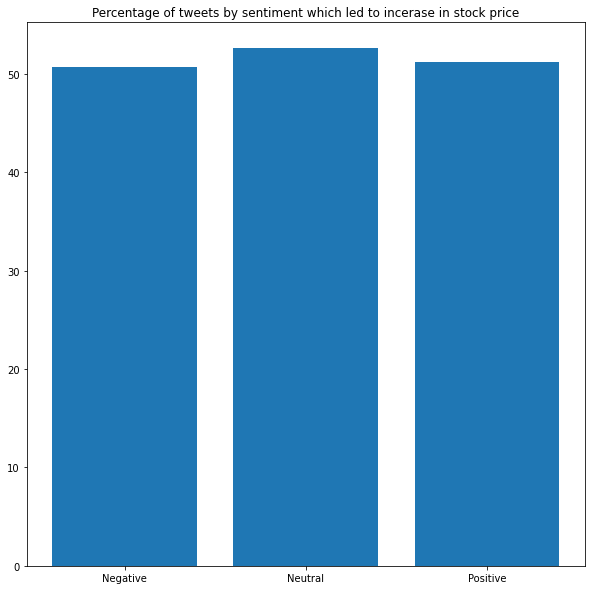

In [ ]:
# Percentage of tweets by sentiment which led to incerase in stock price
plt.figure(figsize = (10, 10))
plt.bar(['Negative', 'Neutral', 'Positive'], [count_0_up, count_1_up, count_2_up])
#plt.grid(axis = 'y')
plt.title('Percentage of tweets by sentiment which led to incerase in stock price')
plt.show()

51.52173913043478 51.646843549862766


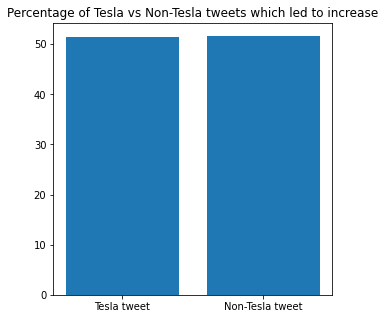

In [ ]:
# Percentage of Tesla vs Non-Tesla tweets which led to increase
plt.figure(figsize = (5, 5))
plt.bar(['Tesla tweet', 'Non-Tesla tweet'], [count_tesla_up, count_non_tesla_up])
plt.title('Percentage of Tesla vs Non-Tesla tweets which led to increase')
print(count_tesla_up, count_non_tesla_up)

<BarContainer object of 2 artists>

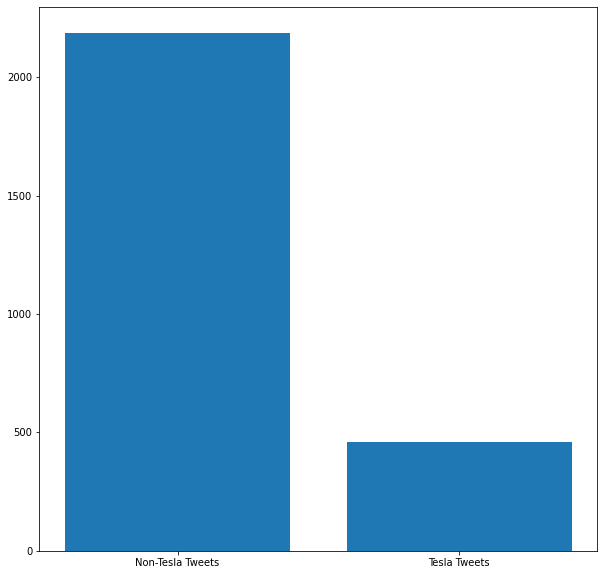

In [ ]:
plt.figure(figsize=(10, 10))
plt.bar(['Non-Tesla Tweets', 'Tesla Tweets'], list(merged_dfs_new.groupby(['Tesla']).size()))
#plt.hist(merged_dfs_new.groupby(['Tesla']).size())

In [ ]:
list(merged_dfs_new.groupby(['Tesla']).size())

[2186, 460]

In [ ]:
# making a new dataset for non-tesla tweets
new_df = merged_dfs_new[merged_dfs_new['Tesla'] == 0]

In [ ]:
new_df

,Unnamed: 0_x,Date,Open,High,Low,Close,Adj Close,Volume,delta,Unnamed: 0_y,...,likes_count,hashtags,link,year,hashtag,new_tweet,sentiment,Tesla,Up,Down
0,0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN,0,...,15281,[],https://twitter.com/elonmusk/status/1381273474...,11,[],now costs decreasing rapidly,0.0,0,1,0
1,1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,-0.004000,1,...,71161,[],https://twitter.com/elonmusk/status/1381273076...,11,[],love beautiful shot,1.0,0,0,1
2,2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,-0.124667,2,...,1380,[],https://twitter.com/elonmusk/status/1381258144...,11,[],trust shrub,0.0,0,0,1
3,3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,-0.184000,3,...,228144,[],https://twitter.com/elonmusk/status/1381221447...,11,[],art cyberpunk incredible,2.0,0,0,1
4,4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,-0.206000,4,...,7489,[],https://twitter.com/elonmusk/status/1381129584...,11,[],NaN,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2640,2640,2020-12-22,216.000000,216.626663,204.743332,213.446671,213.446671,155148000,-3.173325,2640,...,1585,[],https://twitter.com/elonmusk/status/1270800210...,10,[],laser beam long exposure shots,0.0,0,0,1
2641,2641,2020-12-23,210.733337,217.166672,207.523331,215.326660,215.326660,99519000,1.879990,2641,...,1818,[],https://twitter.com/elonmusk/status/1270798719...,10,[],hundreds improvements manufacturability primar...,0.0,0,1,0
2642,2642,2020-12-24,214.330002,222.029999,213.666672,220.589996,220.589996,68596800,5.263336,2642,...,922,[],https://twitter.com/elonmusk/status/1270795898...,10,[],also insulation deep cryogen id call anything ...,0.0,0,1,0
2644,2644,2020-12-29,220.333328,223.300003,218.333328,221.996674,221.996674,68732400,0.766678,2644,...,1760,[],https://twitter.com/elonmusk/status/1270791638...,10,[],important technical note due higher o f ch4 vs...,0.0,0,1,0


In [ ]:
# pearson corr of non-tesla tweets
new_df.corr('pearson')

,Unnamed: 0_x,Open,High,Low,Close,Adj Close,Volume,delta,Unnamed: 0_y,Unnamed: 0.1,replies_count,retweets_count,likes_count,year,sentiment
Unnamed: 0_x,1.000000,0.604166,0.603080,0.605243,0.602709,0.602709,0.549763,0.088621,1.000000,1.000000,-0.186889,-0.117666,-0.175952,0.029743,-0.025623
Open,0.604166,1.000000,0.999594,0.999612,0.999124,0.999124,0.366067,0.177977,0.604166,0.604166,-0.107505,-0.067112,-0.098609,0.004661,-0.050403
High,0.603080,0.999594,1.000000,0.999500,0.999677,0.999677,0.372643,0.192370,0.603080,0.603080,-0.107349,-0.067184,-0.098503,0.003694,-0.049824
Low,0.605243,0.999612,0.999500,1.000000,0.999547,0.999547,0.361305,0.190668,0.605243,0.605243,-0.108197,-0.067262,-0.098908,0.005537,-0.050108
Close,0.602709,0.999124,0.999677,0.999547,1.000000,1.000000,0.367531,0.208159,0.602709,0.602709,-0.107870,-0.067369,-0.098750,0.004417,-0.050136
Adj Close,0.602709,0.999124,0.999677,0.999547,1.000000,1.000000,0.367531,0.208159,0.602709,0.602709,-0.107870,-0.067369,-0.098750,0.004417,-0.050136
Volume,0.549763,0.366067,0.372643,0.361305,0.367531,0.367531,1.000000,0.123531,0.549763,0.549763,-0.106114,-0.082226,-0.102313,-0.037287,-0.031007
delta,0.088621,0.177977,0.192370,0.190668,0.208159,0.208159,0.123531,1.000000,0.088621,0.088621,-0.021751,-0.015740,-0.019574,-0.014160,-0.007339
Unnamed: 0_y,1.000000,0.604166,0.603080,0.605243,0.602709,0.602709,0.549763,0.088621,1.000000,1.000000,-0.186889,-0.117666,-0.175952,0.029743,-0.025623
Unnamed: 0.1,1.000000,0.604166,0.603080,0.605243,0.602709,0.602709,0.549763,0.088621,1.000000,1.000000,-0.186889,-0.117666,-0.175952,0.029743,-0.025623


In [ ]:
# making a new dataframe of professional tweets
new_df2 = merged_dfs_new[merged_dfs_new['Tesla'] == 1]
new_df2.corr('pearson')

,Unnamed: 0_x,Open,High,Low,Close,Adj Close,Volume,delta,Unnamed: 0_y,Unnamed: 0.1,replies_count,retweets_count,likes_count,year,sentiment
Unnamed: 0_x,1.000000,0.588372,0.587745,0.591286,0.588612,0.588612,0.501838,0.018675,1.000000,1.000000,-0.185757,-0.106640,-0.134146,-0.107528,0.026049
Open,0.588372,1.000000,0.999462,0.998975,0.998855,0.998855,0.452582,0.063477,0.588372,0.588372,-0.051743,-0.000624,0.008508,0.076280,0.039675
High,0.587745,0.999462,1.000000,0.998793,0.999464,0.999464,0.458032,0.083600,0.587745,0.587745,-0.051594,-0.001188,0.007804,0.076003,0.038763
Low,0.591286,0.998975,0.998793,1.000000,0.999119,0.999119,0.441507,0.080932,0.591286,0.591286,-0.053264,-0.001066,0.007273,0.074601,0.036781
Close,0.588612,0.998855,0.999464,0.999119,1.000000,1.000000,0.448259,0.101862,0.588612,0.588612,-0.053028,-0.001478,0.006862,0.075644,0.036899
Adj Close,0.588612,0.998855,0.999464,0.999119,1.000000,1.000000,0.448259,0.101862,0.588612,0.588612,-0.053028,-0.001478,0.006862,0.075644,0.036899
Volume,0.501838,0.452582,0.458032,0.441507,0.448259,0.448259,1.000000,-0.031993,0.501838,0.501838,-0.038903,-0.018873,-0.000121,0.014074,0.076894
delta,0.018675,0.063477,0.083600,0.080932,0.101862,0.101862,-0.031993,1.000000,0.018675,0.018675,0.010669,0.031366,0.038845,0.020486,0.026873
Unnamed: 0_y,1.000000,0.588372,0.587745,0.591286,0.588612,0.588612,0.501838,0.018675,1.000000,1.000000,-0.185757,-0.106640,-0.134146,-0.107528,0.026049
Unnamed: 0.1,1.000000,0.588372,0.587745,0.591286,0.588612,0.588612,0.501838,0.018675,1.000000,1.000000,-0.185757,-0.106640,-0.134146,-0.107528,0.026049


In [ ]:
new_df[new_df['sentiment'] == 2.0].corr()

,Unnamed: 0_x,Open,High,Low,Close,Adj Close,Volume,delta,Unnamed: 0_y,Unnamed: 0.1,replies_count,retweets_count,likes_count,year,sentiment
Unnamed: 0_x,1.000000,0.611260,0.611038,0.612370,0.611068,0.611068,0.555501,0.066203,1.000000,1.000000,-0.212217,-0.152140,-0.211049,0.069150,NaN
Open,0.611260,1.000000,0.999525,0.999737,0.999113,0.999113,0.392069,0.122240,0.611260,0.611260,-0.130559,-0.096632,-0.125157,0.047429,NaN
High,0.611038,0.999525,1.000000,0.999529,0.999729,0.999729,0.400268,0.136378,0.611038,0.611038,-0.130626,-0.096818,-0.125158,0.046420,NaN
Low,0.612370,0.999737,0.999529,1.000000,0.999504,0.999504,0.388561,0.132720,0.612370,0.612370,-0.131461,-0.097359,-0.126045,0.047615,NaN
Close,0.611068,0.999113,0.999729,0.999504,1.000000,1.000000,0.395573,0.152539,0.611068,0.611068,-0.131286,-0.097364,-0.125913,0.046906,NaN
Adj Close,0.611068,0.999113,0.999729,0.999504,1.000000,1.000000,0.395573,0.152539,0.611068,0.611068,-0.131286,-0.097364,-0.125913,0.046906,NaN
Volume,0.555501,0.392069,0.400268,0.388561,0.395573,0.395573,1.000000,0.098654,0.555501,0.555501,-0.104397,-0.088496,-0.109486,0.015492,NaN
delta,0.066203,0.122240,0.136378,0.132720,0.152539,0.152539,0.098654,1.000000,0.066203,0.066203,-0.027818,-0.020704,-0.031290,-0.016943,NaN
Unnamed: 0_y,1.000000,0.611260,0.611038,0.612370,0.611068,0.611068,0.555501,0.066203,1.000000,1.000000,-0.212217,-0.152140,-0.211049,0.069150,NaN
Unnamed: 0.1,1.000000,0.611260,0.611038,0.612370,0.611068,0.611068,0.555501,0.066203,1.000000,1.000000,-0.212217,-0.152140,-0.211049,0.069150,NaN


In [ ]:
new_df.columns

Index(['Unnamed: 0_x', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume', 'delta', 'Unnamed: 0_y', 'Unnamed: 0.1', 'date', 'time',
       'username', 'tweet', 'mentions', 'urls', 'photos', 'replies_count',
       'retweets_count', 'likes_count', 'hashtags', 'link', 'year', 'hashtag',
       'new_tweet', 'sentiment', 'Tesla', 'Up', 'Down'],
      dtype='object')

In [ ]:
# creating a copy dataframe to work with
data_working = new_df.drop(columns = ['Unnamed: 0_x', 'Open', 'High', 'Low', 'Adj Close', 'Volume', 'Unnamed: 0_y', 'date', 'time', 'username', 'mentions', 'urls', 'photos', 
                            'hashtags', 'link', 'year', 'hashtag'])

In [ ]:
data_working.head()

,Date,Close,delta,Unnamed: 0.1,tweet,replies_count,retweets_count,likes_count,new_tweet,sentiment,Tesla,Up,Down
0,2010-06-29,1.592667,NaN,0,@vincent13031925 For now. Costs are decreasing...,640,444,15281,now costs decreasing rapidly,0.0,0,1,0
1,2010-06-30,1.588667,-0.004000,1,Love this beautiful shot,2464,1517,71161,love beautiful shot,1.0,0,0,1
2,2010-07-01,1.464000,-0.124667,2,@agnostoxxx @CathieDWood @ARKInvest Trust the ...,115,48,1380,trust shrub,0.0,0,0,1
3,2010-07-02,1.280000,-0.184000,3,The art In Cyberpunk is incredible,8437,10329,228144,art cyberpunk incredible,2.0,0,0,1
4,2010-07-06,1.074000,-0.206000,4,@itsALLrisky 🤣🤣,446,542,7489,NaN,NaN,0,0,1


In [ ]:
data_working['popularity'] = data_working['replies_count'] + data_working['retweets_count'] + data_working['likes_count']
data_working['popularity'][:5]

0     16365
1     75142
2      1543
3    246910
4      8477
Name: popularity, dtype: int64

## t-test: 
used to determine if there is significant deference between means of two variables and lets us know if they belong to the same distribution



In [ ]:
# t-test : used to determine if there is significant deference between means of two variables and lets us know if they belong to the same distribution
from scipy.stats import ttest_ind
res = ttest_ind(data_working['delta'].dropna(), data_working['sentiment'].dropna())
print(res)

Ttest_indResult(statistic=-17.918510002454365, pvalue=3.2494702069911295e-69)


In [ ]:
import scipy.stats as stats

stats.shapiro(data_working['delta'].dropna())


ShapiroResult(statistic=0.42332106828689575, pvalue=0.0)

In [ ]:
res = ttest_ind(data_working['likes_count'].dropna(), data_working['delta'].dropna())
print(res)

Ttest_indResult(statistic=19.86092470306417, pvalue=4.122389213680444e-84)


In [ ]:
res = ttest_ind(data_working['replies_count'].dropna(), data_working['delta'].dropna())
print(res)

Ttest_indResult(statistic=17.53185035495111, pvalue=1.4824015513509148e-66)


In [ ]:
res = ttest_ind(data_working['retweets_count'].dropna(), data_working['delta'].dropna())
print(res)

Ttest_indResult(statistic=14.251006675668627, pvalue=4.461050115818098e-45)


In [ ]:
res = ttest_ind(data_working['popularity'].dropna(), data_working['delta'].dropna())
print(res)

Ttest_indResult(statistic=19.503696426355365, pvalue=2.6741647860258144e-81)


In [ ]:
res = ttest_ind(data_working['likes_count'].dropna(), data_working['replies_count'].dropna())
print(res)

Ttest_indResult(statistic=19.11336176808008, pvalue=2.8207182045902886e-78)


In [ ]:
!pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##chi-sq test


chi-sq test of independence: to check whether two categorical variables are likely to be related or not; means if a significant relationship is found between them or not

Checking the assumptions for the  test of independence is easy. Let's recall what they are:

The two samples are independent

The variables were collected independently of each other, i.e. the answer from one variable was not dependent on the answer of the other

No expected cell count is = 0
No more than 20% of the cells have and expected cell count < 5

\\
Null H: variables are independent



Alt H: varibles are dependent

In [ ]:
# chi-sq test of independence: to check whether two categorical variables are likely to be related or not
# means if a significant relationship is found between them or not

import researchpy as rp
import scipy.stats as stats

data_working_copy = data_working.dropna()

crosstab, test_results, expected = rp.crosstab(data_working_copy['sentiment'], data_working_copy['Up'],
                                               test= 'chi-square',
                                               expected_freqs= True,
                                               prop= 'cell')

test_results

# we accept the null hypothesis since the p-value is greater than 0.05

,Chi-square test,results
0,Pearson Chi-square ( 2.0) =,0.2834
1,p-value =,0.8679
2,Cramer's V =,0.0120


In [ ]:
crosstab, test_results, expected = rp.crosstab(data_working_copy['sentiment'], data_working_copy['Down'],
                                               test= 'chi-square',
                                               expected_freqs= True,
                                               prop= 'cell')

test_results

,Chi-square test,results
0,Pearson Chi-square ( 2.0) =,0.2834
1,p-value =,0.8679
2,Cramer's V =,0.0120


In [ ]:
crosstab

Down               
Down           0      1     All
sentiment                      
0.0        25.65  24.83   50.48
1.0         6.02   5.41   11.42
2.0        19.63  18.46   38.09
All        51.30  48.70  100.00

In [ ]:
expected

Down            
Down                0           1
sentiment                        
0.0        507.873534  482.126466
1.0        114.912800  109.087200
2.0        383.213666  363.786334

Since, each of the groups is not roughly normally distributed, it is better to performa a
## Kruskal Wallis H Test 
here

The Kruskal Wallis test is the non parametric alternative to the One Way ANOVA. Non parametric means that the test doesn’t assume your data comes from a particular distribution. The H-test is used when the conditions for ANOVA aren't met.

In [ ]:
results = stats.kruskal(sentiment_0_close, sentiment_1_close, sentiment_2_close)
results

KruskalResult(statistic=4.698423323014863, pvalue=0.09544437503981516)

Since, the p-value is greater than 0.05, we accept the null hypothesis. Hence, we can say that there is no difference in the impact of different tweets based on emotions. 

## Mann Whitney U test:

usually performed instead of Kruskal when there are two groups.

In [ ]:
tesla_0_close = []
tesla_1_close = []

tesla_0_delta = []
tesla_1_delta = []

data_working_copy = data_working_copy.reset_index(drop = True)

for i in range(len(data_working_copy)):
  if data_working_copy['Tesla'][i] == 0:
    tesla_0_close.append(data_working_copy['Close'][i])
    tesla_0_delta.append(data_working_copy['delta'][i])
  elif data_working_copy['Tesla'][i] == 1:
    tesla_1_close.append(data_working_copy['Close'][i])
    tesla_1_delta.append(data_working_copy['delta'][i])  

Since, the p-value is very close to zero, we can reject the null-hypothesis and we can say that the impact that the non-tesla tweets have on the closing price is statistically different than the impact of tesla tweets.

In [ ]:
results = stats.kruskal(tesla_up_pop, non_tesla_up_pop)
results

KruskalResult(statistic=nan, pvalue=nan)